In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as math
import pandas as pd

import scipy.integrate as integrate
import scipy.special as special

import random as random
import scipy.optimize as optimize

import importlib
import gc

In [87]:
import Functions_Xyloportas as f # All functions we will use

In [88]:
# Update any changes in Functions_Xyloportas.py file
importlib.reload(f)
#help(f)

<module 'Functions_Xyloportas' from 'C:\\Users\\XYLOPORTAS\\Desktop\\Φυσικό ΕΚΠΑ (2020-2024)\\8ο Εξάμηνο\\Πτυχιακή Εργασία\\Latex_code\\Functions_Xyloportas.py'>

In [89]:
# Parameters (Units: cgs)
st = 0.665245*(10**-24) # Thomson scattering cross section
c = 2.997925*(10**10) # speed of light
m = 9.10956*(10**-28) # mass of particles (electron)
qq = 4.80325*(10**-10) # charge of particles (electron)
pi = math.pi

h = 6.625*10**-27 # Planck constant (erg*sec)
ev_to_erg = 1.602162*10**-12 # erg/eV
erg_to_ev = 1/ev_to_erg # eV/erg
kev_to_erg = ev_to_erg/(10**-3) # erg/keV
erg_to_kev = (10**-3)/ev_to_erg # keV/erg

print("1 erg = %0.2e keV" %erg_to_kev)
print("1 keV = %0.2e erg" %kev_to_erg)

1 erg = 6.24e+08 keV
1 keV = 1.60e-09 erg


In [64]:
# Import observational data, from all timeframes
timeframes = [(0,2), (6,8), (10,12), (18,20), (30,34), (50,60)]
GRB_data = [0]*len(timeframes) # data (units: keV,keV/s*cm^2)
GRB_dataCGS = [0]*len(timeframes)  # data (cgs units: Hz,erg/s*cm^2)
for q in range(len(timeframes)):
    GRB_data[q] = np.loadtxt('./data/{}-{}s.txt'.format(timeframes[q][0], timeframes[q][1]), unpack=True, skiprows=1)
    GRB_dataCGS[q] = np.loadtxt('./data/{}-{}s.txt'.format(timeframes[q][0], timeframes[q][1]), unpack=True, skiprows=1)
#print(GRB_data[0][4][0]) # [timeframe][parameter][value]

In [65]:
# Energy (keV to Hz) , Flux (keV to erg/s*cm^2)
for q in range(len(timeframes)):
    GRB_dataCGS[q][0] = GRB_dataCGS[q][0]*kev_to_erg/h # keV to Hz (keV)
    GRB_dataCGS[q][1] = GRB_dataCGS[q][1]*kev_to_erg/h # keV to Hz (keVe)
    GRB_dataCGS[q][2] = GRB_dataCGS[q][2]*kev_to_erg   # keV/s*cm^2 to erg/s*cm^2 (f)
    GRB_dataCGS[q][3] = GRB_dataCGS[q][3]*kev_to_erg   # keV/s*cm^2 to erg/s*cm^2 (fe)
    GRB_dataCGS[q][4] = GRB_dataCGS[q][4]*kev_to_erg   # keV/s*cm^2 to erg/s*cm^2 (mod)

In [7]:
# Import Spectral Breaks
SpectralBreaksA = pd.read_csv('./SpectralBreaks/SpBrA.txt', delimiter='\t') # t<40s
print(SpectralBreaksA)
TimeA = SpectralBreaksA["Time"] # sec
TimeerA = SpectralBreaksA["Timeer"] # sec
EbA = SpectralBreaksA["Eb"] # keV
EberA = SpectralBreaksA["Eber"] # keV
EpA = SpectralBreaksA["Ep"] # keV
EperA = SpectralBreaksA["Eper"] # keV

SpectralBreaksB = pd.read_csv('./SpectralBreaks/SpBrB.txt', delimiter='\t') # t>40s
print(SpectralBreaksB)
TimeB = SpectralBreaksB["Time"] # sec
TimeerB = SpectralBreaksB["Timeer"] # sec
EpB = SpectralBreaksB["Ep"] # keV
EperB = SpectralBreaksB["Eper"] # keV

    Time  Timeer    Eb  Eber      Ep   Eper
0    1.0     1.0  21.0   8.8  2411.3  602.0
1    3.0     1.0  46.7   8.2   951.6   47.4
2    5.0     1.0  30.7   3.3   721.0   47.5
3    7.0     1.0  64.3   4.9  1543.0   47.5
4    9.0     1.0  30.0   2.7  1053.6   72.0
5   11.0     1.0  28.5   2.4   567.1  135.7
6   14.0     2.0  19.9   3.6   257.3  205.7
7   17.0     1.0  20.6   4.2   275.0   40.9
8   19.0     1.0  27.2   2.8   580.0   86.5
9   21.0     1.0  23.8   2.9   319.6   45.8
10  23.0     1.0  24.2   2.6   335.2   51.5
11  25.0     1.0  24.8   2.7   305.5   47.9
12  28.0     2.0  24.3   0.9    83.9   30.3
13  32.0     2.0  17.2   3.7    69.8   16.9
14  36.0     2.0  20.2   1.6   225.6   50.9
15  40.0     2.0  17.6   4.2    76.3   15.9
     Time  Timeer     Ep  Eper
0    44.0     2.0  37.70  3.06
1    48.0     2.0  42.20  5.61
2    55.0     5.0  35.50  2.29
3    65.0     5.0  36.40  4.32
4    85.0     5.0   7.74  0.81
5    95.0     5.0   5.81  0.83
6   105.0     5.0   4.59  0.54
7   

In [8]:
# timeframes = [(0,2), (6,8), (10,12), (18,20), (30,34), (50,60)]
Ep_array = [EpA[0],EpA[3],EpA[5],EpA[8],EpA[13],EpB[2]]
Eb_array = [EbA[0],EbA[3],EbA[5],EbA[8],EbA[13],0]

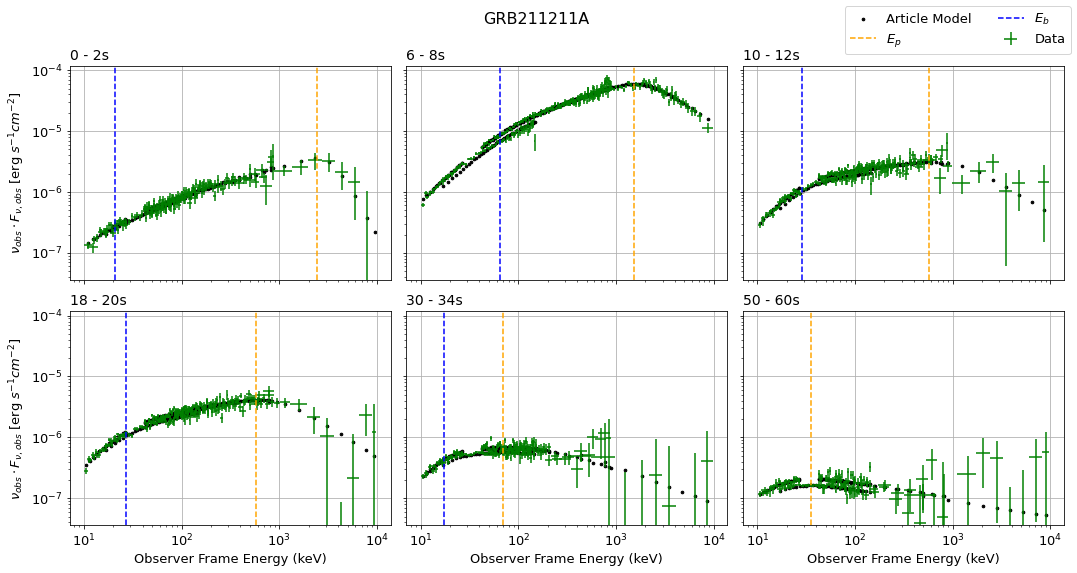

In [9]:
# GRB spectra, with Spectral Breaks included
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.set_size_inches(15,8)
fig.suptitle('GRB211211A', fontsize=16)

for q in range(len(timeframes)):
    ax[q//3, q-(q//3)*3].errorbar(GRB_data[q][0],GRB_dataCGS[q][2],xerr=GRB_data[q][1],yerr=GRB_dataCGS[q][3], fmt='none', elinewidth=1.5, c='g', label="Data")
    ax[q//3, q-(q//3)*3].scatter(GRB_data[q][0],GRB_dataCGS[q][4], marker='o', s=7, c='k', label="Article Model")
    ax[q//3, q-(q//3)*3].axvline(x=Ep_array[q],linestyle="--",c='orange', label="$E_p$") # E_p
    ax[q//3, q-(q//3)*3].axvline(x=Eb_array[q],linestyle="--",c='b', label="$E_b$") # E_b
    ax[q//3, q-(q//3)*3].set_yscale("log")
    ax[q//3, q-(q//3)*3].set_xscale("log")
    ax[q//3, q-(q//3)*3].grid()
    #ax[q//3, q-(q//3)*3].legend(fontsize=13)
    ax[q//3, q-(q//3)*3].set_title('{} - {}s'.format(timeframes[q][0], timeframes[q][1]), loc='left', fontsize=14)
    ax[q//3, q-(q//3)*3].tick_params(axis='both', which='major', labelsize=13)

# Add a single legend for the entire figure
handles, labels = ax.flat[0].get_legend_handles_labels()  # Get handles and labels from one subplot
fig.legend(handles, labels, loc='upper right', ncol=2, fontsize=13, frameon=True)

for ax in ax.flat:
    ax.set_xlabel('Observer Frame Energy (keV)', fontsize=13)
    ax.set_ylabel(r'$\nu_{obs} \cdot F_{\nu,obs}}$ [erg $s^{-1} cm^{-2}$]', fontsize=13)
    
for ax in fig.get_axes():
    ax.label_outer()

#fig.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space for the legend

## Markov Chain Monte Carlo (MCMC): fit Synchrotron Spectra

Use results of Spectral Breaks $E_p$ & $E_b$ from MCMC, with Model $E_p \sim \gamma_{max}(t)$ & $E_b \sim \gamma_{min}(t)$

### **Step 1**: 
We will need to calculate an Average value of $\nu \cdot F_\nu$ in each timeframe, from our synchrotron Model <br>
There are two methods to calculate an average numerically: <br>
**Method 1**: Sample some times from the timeframe and caclulate the Average <br>
**Method 2**: We have a continuous function $f(t)$ in $(t_1,t_2)$, thus we find the mean: $= \dfrac{1}{t_2-t_1} \int_{t_1}^{t_2} f(t) \; dt$  <br>
compare different methods (average vs integral), especially for t=0 (plot + error plot) <br>
Plot one example, with average and each spectra t_i inside timeframe 

In [90]:
# (New) Parameters [MCMC: Model 1]
D = 179.4 # Doppler factor [Jet comoving frame]
B = 0.5193 # Gauss
gmin = 1.656*10**5
gmax = 1.874*10**6
r = 350 #Mpc

A = (st*(B**2))/(6*np.pi*m*c)
w_B = (qq*B)/(m*c) # ω_B gyro-frequency
tr = (gmax-gmin)/(A*gmax*gmin) # t_r (sec)
print("t_{r,obs} = ",tr/D,"sec")

# Estimations for unknown parameters
Qo_test = 10**49 # particles/sec (Injection rate)
p_test = 2 # slope of powerlaw

t_{r,obs} =  88.051797939515 sec


In [11]:
# Energy Range: 10 keV - 10 MeV (E_obs)
Eobs_min = 10 # keV
Vobs_min = Eobs_min*kev_to_erg/h # Hz
Eobs_max = 10**4 # keV (10 MeV)
Vobs_max = Eobs_max*kev_to_erg/h # Hz
print("v_min (obs) = %0.3e Hz" %Vobs_min, ", v_max (obs) = %0.3e Hz" %Vobs_max)

# Rest frame (v_obs = D*v_rest)
Vrest_min = Vobs_min/D # Hz
Vrest_max = Vobs_max/D # Hz
print("v_min (rest) = %0.3e Hz" %Vrest_min, ", v_max (rest) = %0.3e Hz" %Vrest_max)

vv_rest = np.logspace(np.log10(Vrest_min),np.log10(Vrest_max),50) # Frequency range, rest frame (Hz)
vv_obs = D*vv_rest  # v_obs = D*v (Hz)
EE_obs = h*vv_obs*erg_to_kev  # E_obs (keV)
print("E_obs (keV): ",EE_obs)

v_min (obs) = 2.418e+18 Hz , v_max (obs) = 2.418e+21 Hz
v_min (rest) = 1.348e+16 Hz , v_max (rest) = 1.348e+19 Hz
E_obs (keV):  [1.00000000e+01 1.15139540e+01 1.32571137e+01 1.52641797e+01
 1.75751062e+01 2.02358965e+01 2.32995181e+01 2.68269580e+01
 3.08884360e+01 3.55648031e+01 4.09491506e+01 4.71486636e+01
 5.42867544e+01 6.25055193e+01 7.19685673e+01 8.28642773e+01
 9.54095476e+01 1.09854114e+02 1.26485522e+02 1.45634848e+02
 1.67683294e+02 1.93069773e+02 2.22299648e+02 2.55954792e+02
 2.94705170e+02 3.39322177e+02 3.90693994e+02 4.49843267e+02
 5.17947468e+02 5.96362332e+02 6.86648845e+02 7.90604321e+02
 9.10298178e+02 1.04811313e+03 1.20679264e+03 1.38949549e+03
 1.59985872e+03 1.84206997e+03 2.12095089e+03 2.44205309e+03
 2.81176870e+03 3.23745754e+03 3.72759372e+03 4.29193426e+03
 4.94171336e+03 5.68986603e+03 6.55128557e+03 7.54312006e+03
 8.68511374e+03 1.00000000e+04]


In [12]:
# Time values, to calculate average (for each time-frame)
tt_obs = [0]*len(timeframes)
tt_rest = [0]*len(timeframes)
dt_obs = [0]*len(timeframes)
dt_rest = [0]*len(timeframes)
for q in range (len(timeframes)):
    tt_obs[q] = np.linspace(timeframes[q][0], timeframes[q][1], 10) # Time range in Observer frame (sec) 
    tt_rest[q] = D*tt_obs[q] # t_obs = t_rest/D (sec)
    dt_obs[q] = timeframes[q][1] - timeframes[q][0] # Δt_obs (sec)
    dt_rest[q] = dt_obs[q]*D   # Δt_rest (sec)

In [28]:
# Calculate for one timeframe

q = 1 # Timeframe 6-8s
# Method 1: Simple average [this method is not working when J(t=0)=0 is in the timeframe]
vFlux_obs0608 = [0]*len(tt_rest[q])
for i in range (len(tt_rest[q])):
    t = tt_rest[q][i]   # t_rest (sec)
    vFlux_obs0608[i] = [(x*D)*f.Flux((D**3)*f.Jsyn_constant_pl(x,t,Qo_test,B,p_test,gmin,gmax),r) for x in vv_rest] # Flux v*F(v,t)
Average0608 = [0]*len(vv_rest) # we take 1 average in every v value (for all times)
for k in range (len(Average0608)):
    Sum = 0
    for j in range (len(vFlux_obs0608)): # Sum values in the same v (all times in timeframe)
        #print(vFlux_obs0608[j][k])
        Sum = Sum+vFlux_obs0608[j][k] # [j][k] = [time t][freq. v]
    Average0608[k] = Sum/len(vFlux_obs0608)
print("Average Sum: ",Average0608)

q = 1 # Timeframe 6-8s
# Method 2: Average with Integral
ttt_obs = tt_obs[q] # t_obs (sec)
ttt_rest = ttt_obs*D   # t_rest = D*t_obs (sec)
dtt_obs = dt_obs[q] # Δt_obs (sec)
dtt_rest = dtt_obs*D   # Δt_rest (sec)

y1 = [0]*len(vv_rest)
for i in range(len(vv_rest)):
    x = vv_rest[i] # v_rest (Hz)
    y1[i] = [(x*D)*f.Flux((D**3)*f.Jsyn_constant_pl(x,t,Qo_test,B,p_test,gmin,gmax),r) for t in ttt_rest] # same v, every t in timeframe
I0608 = [0]*len(vv_rest) # average
for k in range(len(vv_rest)):
    I0608[k] = integrate.simpson(y1[k], x=ttt_rest)/dtt_rest # average (for every freq. seperately)
print("Average Integral: ",I0608)

Average Sum:  [5.8010577343626525e-06, 6.850850623704312e-06, 8.071211697816088e-06, 9.483544770584983e-06, 1.1109864528186666e-05, 1.2972045594537127e-05, 1.509080635283599e-05, 1.7484410210077224e-05, 2.0167097811022514e-05, 2.3147312433210502e-05, 2.642584917311924e-05, 2.999414363869239e-05, 3.383300648913388e-05, 3.7912183095354164e-05, 4.2191135763775727e-05, 4.662136198110233e-05, 5.11503316363439e-05, 5.572673396009011e-05, 6.030622050008384e-05, 6.485635719939782e-05, 6.935928624374199e-05, 7.38108851537053e-05, 7.821609151139316e-05, 8.258132741890467e-05, 8.690606735469074e-05, 9.117590981770648e-05, 9.535875002479645e-05, 9.940419765887793e-05, 0.00010324512849594037, 0.00010679992186426119, 0.00010997450216216741, 0.00011266414317058963, 0.00011475551694418629, 0.00011612955692799591, 0.00011666557199249708, 0.00011624688717594036, 0.00011476813479773891, 0.00011214413155344646, 0.00010832001167441997, 0.00010328193151514504, 9.706723969385816e-05, 8.977258390890142e-05, 8

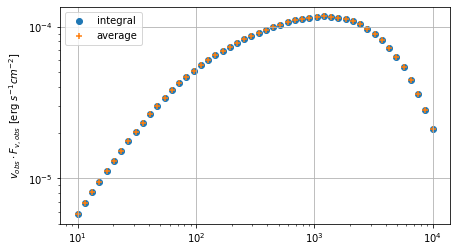

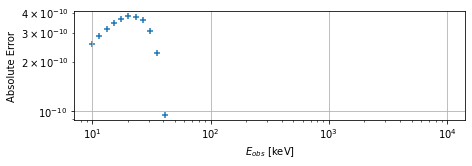

In [29]:
# Compare the 2 methods
error = np.subtract(Average0608,I0608)

fig1 = plt.figure(figsize=(7,4))
plt.scatter(EE_obs,I0608, label="integral") 
plt.scatter(EE_obs,Average0608, marker='+', label="average") 
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$v_{obs} \cdot F_{v,obs}}$ [erg $s^{-1} cm^{-2}$]")
plt.grid()
plt.legend()

fig2 = plt.figure(figsize=(7,2))
plt.scatter(EE_obs,error, marker='+')
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Absolute Error")
plt.xlabel("$E_{obs}$ [keV]")
plt.grid()

In [30]:
# Plot this timeframe
q = 1 # 6-8s
vFlux_68 = [0]*len(tt_rest[q])
for m in range (len(tt_rest[q])):
    t = tt_rest[q][m]
    vFlux_68[m] = [(x*D)*f.Flux((D**3)*f.Jsyn_constant_pl(x,t,Qo_test,B,p_test,gmin,gmax),r) for x in vv_rest]

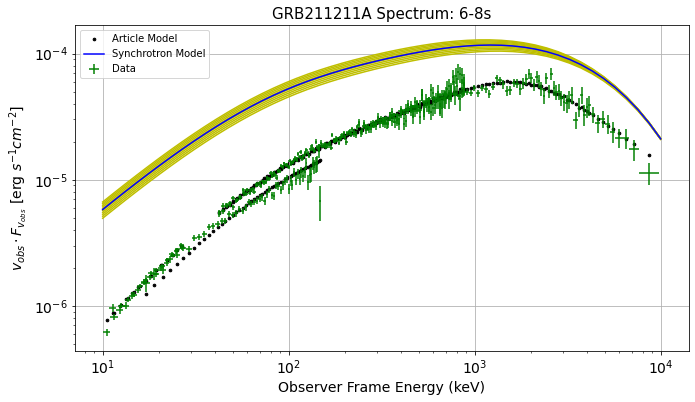

In [31]:
# Plot this timeframe
q = 1 # 6-8s
fig1 = plt.figure(figsize=(11,6))
plt.grid()
plt.xlabel("Observer Frame Energy (keV)", fontsize=14)
plt.ylabel("$v_{obs} \cdot F_{v_{obs}}$ [erg $s^{-1} cm^{-2}$]", fontsize=14)
plt.title("GRB211211A Spectrum: 6-8s", fontsize=15)
plt.yscale("log")
plt.xscale("log")
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.ylim(2*10**2,6*10**4)
#plt.xlim(10**1,10**4)
plt.errorbar(GRB_data[q][0],GRB_dataCGS[q][2],xerr=GRB_data[q][1],yerr=GRB_dataCGS[q][3], fmt='none', elinewidth=1.5, c='g', label="Data")
plt.scatter(GRB_data[q][0],GRB_dataCGS[q][4], marker='o', s=7, c='k', label="Article Model")

for m in range (len(tt_rest[q])):
    plt.plot(EE_obs,vFlux_68[m], c='y')

plt.plot(EE_obs, I0608, label="Synchrotron Model", c='b')
plt.legend()
#plt.savefig('GRB211211A_Spectra_AverageExample.png')

### **Step 2a**: 
MCMC to fit a spectrum in one timeframe, as an example. Find $Q_o$ & $p$.

In [36]:
import emcee
import corner
from IPython.display import display, Math

In [88]:
q = 1 # timeframe 6-8s
# v*Fv flux data
x1 = GRB_dataCGS[q][0] # v_obs (Hz)
y1 = GRB_dataCGS[q][2] # vFv (erg/s*cm^2)
yerr1 = GRB_dataCGS[q][3] # vFv error (erg/s*cm^2)

In [ ]:
ttt_obs = tt_obs[q] # t_obs (sec)
ttt_rest = ttt_obs*D   # t_rest = D*t_obs (sec)
dtt_obs = dt_obs[q] # Δt_obs (sec)
dtt_rest = dtt_obs*D   # Δt_rest (sec)

In [92]:
def vFv_Average_Integral(vobs,log_Q,p_x): # vrest (Hz)
    if np.ndim(vobs) > 0:  # If vrest is an array
        return np.array([vFv_Average_Integral(v, log_Q, p_x) for v in vobs])
    y1 = [vobs*f.Flux((D**3)*f.Jsyn_constant_pl(vobs/D,t,10**log_Q,B,p_x,gmin,gmax),r) for t in ttt_rest] # same v, every t in timeframe
    return integrate.simpson(y1, x=ttt_rest)/dtt_rest # average (at freq. vrest)

def vFv_middleTime(vobs,log_Q,p_x): # vrest (Hz)
    if np.ndim(vobs) > 0:  # If vrest is an array
        return np.array([vFv_middleTime(v, log_Q, p_x) for v in vobs])
    t = (timeframes[q][1] + timeframes[q][0])/2
    return vobs*f.Flux((D**3)*f.Jsyn_constant_pl(vobs/D,t,10**log_Q,B,p_x,gmin,gmax),r)

In [86]:
# log-Likelihood function (v*Fv) 
def log_likelihood_vFv(log_Q, p_x, log_f, x, y, yerr):
    #log_Q, p_x, log_f = theta
    model = vFv_middleTime(x,log_Q,p_x) # vFv_Average_Integral(vrest,log_Q,p_x) 
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
#     if np.any(sigma2 <= 0):
#         print(f"Invalid sigma2: {sigma2}")
#         return -np.inf
    return -0.5 * np.sum((y - model)**2 / sigma2 + np.log(2*np.pi*sigma2))

# log-Prior function (restrict the range of parameters)
def log_prior_vFv(params):
    log_Q, p_x, log_f = params
    if 45 < log_Q < 50 and 1.5 < p_x < 3.5 and -10.0 < log_f < 1.0:
        return 0.0 # Uniform prior
    #print(f"Out-of-bounds parameters: {params}")
    return -np.inf # Outside the bounds
# Probability function = Prior*Likelihood
def log_probability_vFv(params, x1, y1, yerr1):
    log_Q, p_x, log_f = params
    lp = log_prior_vFv(params)
    if not np.isfinite(lp):
        return -np.inf
    ll = log_likelihood_vFv(log_Q, p_x, log_f, x1, y1, yerr1)
    return lp + ll

In [87]:
# log_probability_vFv([48, 2, -2.0], x1[:5], y1[:5], yerr1[:5])

-497.5550628334248

In [89]:
# Thin data arrays for faster results [Get 50 random indices]
indices = np.random.choice(len(x1), 5, replace=False)  # No duplicate indices
# Thin the arrays using these indices
x1_thin = x1[indices]
y1_thin = y1[indices]
yerr1_thin = yerr1[indices]
print(len(x1_thin), len(y1_thin), len(yerr1_thin))

5 5 5


In [90]:
# we guess the "true" (initial) parameters.
log_Q_true1 = 48.5 # log10
p_x_true1 = 2.0
log_f_true1 = -1.03 # random value
solnx1 = [0]*3
solnx1 = [log_Q_true1, p_x_true1, log_f_true1] # array with "true" values (initial guess)
print("Model v*Fv")
print("log_Q_true1, p_x_true1, log_f_true1")
print(solnx1)

Model v*Fv
log_Q_true1, p_x_true1, log_f_true1
[48.5, 2.0, -1.03]


In [ ]:
pos = solnx1 + 1e-2 * np.random.randn(16, 3) # Here we have 3 parameters, choose 32/16 initial positions
nwalkers1, ndim1 = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers1, ndim1, log_probability_vFv, args=(x1_thin, y1_thin, yerr1_thin)
)
sampler.run_mcmc(pos, 1000, progress=True);

Even for only 5 data points (out of $\sim$350), the MCMC has very long computation times... <br>
[in 10 minutes: 1 step only for "vFv_Average_Integral(vrest,log_Q,p_x)"] <br>
["vFv_middleTime(vrest,log_Q,p_x)" faster, but still very long computation, estimate time >4h]

We will try to fit with scipy_fit:

### **Step 2b**: 
scipy_fit to fit a spectrum in one timeframe, as an example. Find $Q_o$ & $p$.

In [13]:
q = 2 # timeframe 10-12s
# v*Fv flux data
x1 = GRB_dataCGS[q][0] # v_obs (Hz)
y1 = GRB_dataCGS[q][2] # vFv (erg/s*cm^2)
yerr1 = GRB_dataCGS[q][3] # vFv error (erg/s*cm^2)

In [24]:
# Function for v*Fv flux
def vFv_middleTime(vobs,log_Q,p_x): # vrest (Hz)
    if np.ndim(vobs) > 0:  # If vrest is an array
        return np.array([vFv_middleTime(v, log_Q, p_x) for v in vobs])
    t_middle = (timeframes[q][1] + timeframes[q][0])/2 # t_obs (sec)
    return vobs*f.Flux((D**3)*f.Jsyn_constant_pl(vobs/D,t_middle*D,10**log_Q,B,p_x,gmin,gmax),r)

In [25]:
# Thin data arrays for faster results [Get 50 random indices]
indices = np.random.choice(len(x1), 50, replace=False)  # No duplicate indices
# Thin the arrays using these indices
x1_thin = x1[indices]
y1_thin = y1[indices]
yerr1_thin = yerr1[indices]
print(len(x1_thin), len(y1_thin), len(yerr1_thin))

50 50 50


In [26]:
# we guess the "true" (initial) parameters.
log_Q_true1 = 48.5 # log10
p_x_true1 = 2.0
print("Model v*Fv")
print("log_Q_true1, p_x_true1")
print(log_Q_true1, p_x_true1)

Model v*Fv
log_Q_true1, p_x_true1
48.5 2.0


In [37]:
# With bounds {vFv_middleTime(vrest,log_Q,p_x)}
popt,pcov = optimize.curve_fit(vFv_middleTime, x1_thin, y1_thin, sigma=yerr1_thin, p0=[log_Q_true1,p_x_true1], bounds=([46,1.0], [52,3.5]))
print(popt)
print(pcov)
print(np.diag(pcov))
print("timeframe: %0.0f" %timeframes[q][0], "- %0.0f" %timeframes[q][1])
print("log(Q_o) = (%0.3f" %popt[0], "+- %0.3f) part./s" %(np.sqrt(np.diag(pcov))[0]))
print("p = %0.3f" %popt[1], "+- %0.3f" %(np.sqrt(np.diag(pcov))[1]))

[51.71530533  2.7631173 ]
[[0.46166318 0.08407673]
 [0.08407673 0.01531417]]
[0.46166318 0.01531417]
timeframe: 10 - 12
log(Q_o) = (51.715 +- 0.679) part./s
p = 2.763 +- 0.124


In [38]:
# Plot
t_test = (timeframes[q][1] + timeframes[q][0])/2
vFlux_test2 = [(x*D)*f.Flux((D**3)*f.Jsyn_constant_pl(x,t_test*D,10**51.715,B,2.763,gmin,gmax),r) for x in vv_rest]

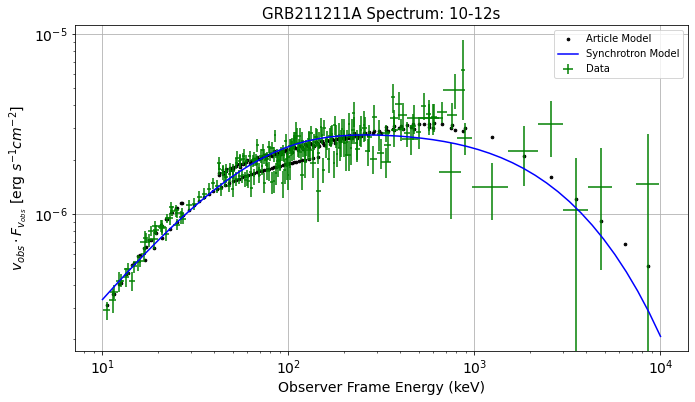

In [39]:
# Plot this timeframe
q = 2 # 10-12s
fig1 = plt.figure(figsize=(11,6))
plt.grid()
plt.xlabel("Observer Frame Energy (keV)", fontsize=14)
plt.ylabel("$v_{obs} \cdot F_{v_{obs}}$ [erg $s^{-1} cm^{-2}$]", fontsize=14)
plt.title("GRB211211A Spectrum: 10-12s", fontsize=15)
plt.yscale("log")
plt.xscale("log")
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.ylim(2*10**2,6*10**4)
#plt.xlim(10**1,10**4)
plt.errorbar(GRB_data[q][0],GRB_dataCGS[q][2],xerr=GRB_data[q][1],yerr=GRB_dataCGS[q][3], fmt='none', elinewidth=1.5, c='g', label="Data")
plt.scatter(GRB_data[q][0],GRB_dataCGS[q][4], marker='o', s=7, c='k', label="Article Model")

# for m in range (len(tt_rest[q])):
#     plt.plot(EE_obs,vFlux_68[m], c='y')
plt.plot(EE_obs, vFlux_test2, label="Synchrotron Model", c='b')
#plt.plot(EE_obs, I0608, label="Synchrotron Model", c='b')
plt.legend()

### **Step 3**: 
Find the injection rate $Q_i$ & power-law slope $p$ at each timeframe . <br>
However we have seen that MCMC for each spectra (in every timeframe) is too long of a computation. 

In [115]:
# Parameters (Units: cgs)
st = 0.665245*(10**-24) # Thomson scattering cross section
c = 2.997925*(10**10) # speed of light
m = 9.10956*(10**-28) # mass of particles (electron)
qq = 4.80325*(10**-10) # charge of particles (electron)
pi = math.pi

h = 6.625*10**-27 # Planck constant (erg*sec)
ev_to_erg = 1.602162*10**-12 # erg/eV
erg_to_ev = 1/ev_to_erg # eV/erg
kev_to_erg = ev_to_erg/(10**-3) # erg/keV
erg_to_kev = (10**-3)/ev_to_erg # keV/erg

print("1 erg = %0.2e keV" %erg_to_kev)
print("1 keV = %0.2e erg" %kev_to_erg)

1 erg = 6.24e+08 keV
1 keV = 1.60e-09 erg


In [116]:
# (New) Parameters [MCMC: Model 1]
D = 179.4 # Doppler factor [Jet comoving frame]
B = 0.5193 # Gauss
gmin = 1.656*10**5
gmax = 1.874*10**6
r = 350 #Mpc

A = (st*(B**2))/(6*np.pi*m*c)
w_B = (qq*B)/(m*c) # ω_B gyro-frequency
tr = (gmax-gmin)/(A*gmax*gmin) # t_r (sec)
print("t_{r,obs} = ",tr/D,"sec")

# Estimations for unknown parameters
Qo_test = 10**49 # particles/sec (Injection rate)
p_test = 2 # slope of powerlaw

t_{r,obs} =  88.051797939515 sec


In [12]:
# Energy Range: 10 keV - 10 MeV (E_obs)
Eobs_min = 10 # keV
Vobs_min = Eobs_min*kev_to_erg/h # Hz
Eobs_max = 10**4 # keV (10 MeV)
Vobs_max = Eobs_max*kev_to_erg/h # Hz
print("v_min (obs) = %0.3e Hz" %Vobs_min, ", v_max (obs) = %0.3e Hz" %Vobs_max)

# Rest frame (v_obs = D*v_rest)
Vrest_min = Vobs_min/D # Hz
Vrest_max = Vobs_max/D # Hz
print("v_min (rest) = %0.3e Hz" %Vrest_min, ", v_max (rest) = %0.3e Hz" %Vrest_max)

vv_rest = np.logspace(np.log10(Vrest_min),np.log10(Vrest_max),50) # Frequency range, rest frame (Hz)
vv_obs = D*vv_rest  # v_obs = D*v (Hz)
EE_obs = h*vv_obs*erg_to_kev  # E_obs (keV)
print("E_obs (keV): ",EE_obs)

v_min (obs) = 2.418e+18 Hz , v_max (obs) = 2.418e+21 Hz
v_min (rest) = 1.348e+16 Hz , v_max (rest) = 1.348e+19 Hz
E_obs (keV):  [1.00000000e+01 1.15139540e+01 1.32571137e+01 1.52641797e+01
 1.75751062e+01 2.02358965e+01 2.32995181e+01 2.68269580e+01
 3.08884360e+01 3.55648031e+01 4.09491506e+01 4.71486636e+01
 5.42867544e+01 6.25055193e+01 7.19685673e+01 8.28642773e+01
 9.54095476e+01 1.09854114e+02 1.26485522e+02 1.45634848e+02
 1.67683294e+02 1.93069773e+02 2.22299648e+02 2.55954792e+02
 2.94705170e+02 3.39322177e+02 3.90693994e+02 4.49843267e+02
 5.17947468e+02 5.96362332e+02 6.86648845e+02 7.90604321e+02
 9.10298178e+02 1.04811313e+03 1.20679264e+03 1.38949549e+03
 1.59985872e+03 1.84206997e+03 2.12095089e+03 2.44205309e+03
 2.81176870e+03 3.23745754e+03 3.72759372e+03 4.29193426e+03
 4.94171336e+03 5.68986603e+03 6.55128557e+03 7.54312006e+03
 8.68511374e+03 1.00000000e+04]


In [13]:
# Time values, to calculate average (for each time-frame)
tt_obs = [0]*len(timeframes)
tt_rest = [0]*len(timeframes)
dt_obs = [0]*len(timeframes)
dt_rest = [0]*len(timeframes)
for q in range (len(timeframes)):
    tt_obs[q] = np.linspace(timeframes[q][0], timeframes[q][1], 10) # Time range in Observer frame (sec) 
    tt_rest[q] = D*tt_obs[q] # t_obs = t_rest/D (sec)
    dt_obs[q] = timeframes[q][1] - timeframes[q][0] # Δt_obs (sec)
    dt_rest[q] = dt_obs[q]*D   # Δt_rest (sec)

In [14]:
# Function for v*Fv flux
def vFv_middleTime(vobs,log_Q,p_x): # vrest (Hz)
    if np.ndim(vobs) > 0:  # If vrest is an array
        return np.array([vFv_middleTime(v, log_Q, p_x) for v in vobs])
    t_middle = (timeframes[q][1] + timeframes[q][0])/2 # t_obs (sec)
    return vobs*f.Flux((D**3)*f.Jsyn_constant_pl(vobs/D,t_middle*D,10**log_Q,B,p_x,gmin,gmax),r)

In [15]:
# we guess the "true" (initial) parameters.
log_Q_true1 = 48.5 # log10
p_x_true1 = 2.0
print("Model v*Fv")
print("log_Q_true1, p_x_true1")
print(log_Q_true1, p_x_true1)

Model v*Fv
log_Q_true1, p_x_true1
48.5 2.0


In [16]:
# results log(Q_o), p :
log_Q_fit = [0]*len(timeframes)
log_Qer_fit = [0]*len(timeframes)
p_fit = [0]*len(timeframes)
per_fit = [0]*len(timeframes)

In [17]:
for q in range (len(timeframes)):
    # v*Fv flux data
    x1 = GRB_dataCGS[q][0] # v_obs (Hz)
    y1 = GRB_dataCGS[q][2] # vFv (erg/s*cm^2)
    yerr1 = GRB_dataCGS[q][3] # vFv error (erg/s*cm^2)
    t_middle = (timeframes[q][1] + timeframes[q][0])/2 # t_obs (sec)
    # Thin data arrays for faster results [Get 50 random indices]
    indices = np.random.choice(len(x1), 50, replace=False)  # No duplicate indices
    x1_thin = x1[indices]
    y1_thin = y1[indices]
    yerr1_thin = yerr1[indices]
    # Fit {vFv_middleTime(vrest,log_Q,p_x)}
    popt,pcov = optimize.curve_fit(vFv_middleTime, x1_thin, y1_thin, sigma=yerr1_thin, p0=[log_Q_true1,p_x_true1], bounds=([46,1.0], [54,3.5]))
    log_Q_fit[q] = popt[0]
    log_Qer_fit[q] = np.sqrt(np.diag(pcov))[0]
    p_fit[q] = popt[1]
    per_fit[q] = np.sqrt(np.diag(pcov))[1]
    #print(popt)
    #print(pcov)
    #print(np.diag(pcov))
    print("timeframe: %0.0f" %timeframes[q][0], "- %0.0f" %timeframes[q][1])
    print("log(Q_o) = %0.3f" %log_Q_fit[q], "+- %0.3f  (part./s)" %log_Qer_fit[q])
    print("p = %0.3f" %p_fit[q], "+- %0.3f" %per_fit[q])

timeframe: 0 - 2
log(Q_o) = 49.793 +- 0.683  (part./s)
p = 2.310 +- 0.123
timeframe: 6 - 8
log(Q_o) = 46.000 +- 0.800  (part./s)
p = 1.587 +- 0.142
timeframe: 10 - 12
log(Q_o) = 52.302 +- 0.651  (part./s)
p = 2.873 +- 0.119
timeframe: 18 - 20
log(Q_o) = 49.148 +- 0.474  (part./s)
p = 2.329 +- 0.085
timeframe: 30 - 34
log(Q_o) = 54.000 +- 1.482  (part./s)
p = 3.338 +- 0.272
timeframe: 50 - 60
log(Q_o) = 54.000 +- 2.679  (part./s)
p = 3.463 +- 0.493


In [18]:
# Save the results
f = open("GRB_fits.txt", "w")
f.write("logQo,logQo_er,p,p_er\n")
for q in range (len(timeframes)):
    f.write(f"{log_Q_fit[q]},")
    f.write(f"{log_Qer_fit[q]},")
    f.write(f"{p_fit[q]},")
    f.write(f"{per_fit[q]}\n")
f.close()
Qp_fits = pd.read_csv('GRB_fits.txt', delimiter = ",")
Qp_fits
# log_Q_fit = Qp_fits["logQo"]
# log_Qer_fit = Qp_fits["logQo_er"]
# p_fit = Qp_fits["p"]
# per_fit = Qp_fits["p_er"]

,logQo,logQo_er,p,p_er
0,49.792967,0.683240,2.310197,0.123020
1,46.000000,0.799684,1.586896,0.141604
2,52.301883,0.650567,2.872536,0.118650
3,49.148391,0.474464,2.329226,0.085155
4,54.000000,1.482020,3.338088,0.271604
5,54.000000,2.679204,3.463271,0.492704


Plot

In [117]:
# γ -> E_{obs} (keV)
def Eobs_fromg(g,D,B):
    E = D*h*qq*B*(g**2)/(2*math.pi*m*c) # E_{obs}(erg)
    return E*erg_to_kev # E_{obs}(keV)
# E_{obs} (keV) -> γ 
def g_fromEobs(E,D,B):
    Eerg = E*kev_to_erg # E_{obs}(erg)
    return (2*math.pi*m*c*E/(D*h*qq*B))**0.5 # γ

def fit_E_gt(tobs,go,BB,DD): # t = independent variable (t_obs)
    t = tobs*DD # t_obs = t_rest/D
    gg = f.g_evolutionB(go,t,BB) # = go/(1+((st*BB**2)/(6*m*c*pi))*go*t) = go/(1+A*go*t)    [γ(t)]
    return Eobs_fromg(gg,DD,BB) # E_obs (keV)

In [119]:
# Plot
t_test = [0]*len(timeframes) 
for q in range (len(timeframes)):
    t_test[q] = (timeframes[q][1] + timeframes[q][0])/2 # t_obs (sec)
vFlux_fits = [0]*len(timeframes)
for q in range (len(timeframes)):
    vFlux_fits[q] = [(x*D)*f.Flux((D**3)*f.Jsyn_constant_pl(x,t_test[q]*D,10**log_Q_fit[q],B,p_fit[q],gmin,gmax),r) for x in vv_rest]
Ep_fits = [0]*len(timeframes)
Eb_fits = [0]*len(timeframes)
for q in range (len(timeframes)):
    #t_test = (timeframes[q][1] + timeframes[q][0])/2 # t_obs (sec)
    Ep_fits[q] = fit_E_gt(t_test[q],gmax,B,D)
    Eb_fits[q] = fit_E_gt(t_test[q],gmin,B,D)

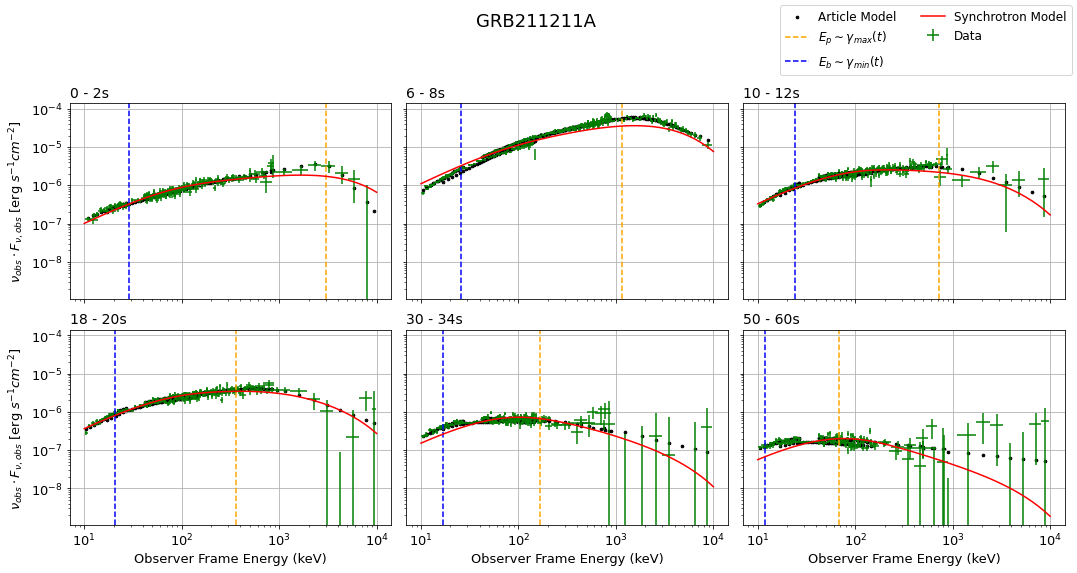

In [123]:
# GRB spectra + Spectral Breaks + fits of Synchrotron Model 
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.set_size_inches(15,8)
fig.suptitle('GRB211211A', fontsize=18)

for q in range(len(timeframes)):
    ax[q//3, q-(q//3)*3].errorbar(GRB_data[q][0],GRB_dataCGS[q][2],xerr=GRB_data[q][1],yerr=GRB_dataCGS[q][3], fmt='none', elinewidth=1.5, c='g', label="Data")
    ax[q//3, q-(q//3)*3].scatter(GRB_data[q][0],GRB_dataCGS[q][4], marker='o', s=7, c='k', label="Article Model")
    #ax[q//3, q-(q//3)*3].axvline(x=Ep_array[q],linestyle="--",c='orange', label="$E_p$") # E_p
    #ax[q//3, q-(q//3)*3].axvline(x=Eb_array[q],linestyle="--",c='b', label="$E_b$") # E_b
    ax[q//3, q-(q//3)*3].axvline(x=Ep_fits[q],linestyle="--",c='orange', label="$E_p \sim γ_{max}(t)$") # E_p (γ_max(t)) 
    ax[q//3, q-(q//3)*3].axvline(x=Eb_fits[q],linestyle="--",c='b', label="$E_b \sim γ_{min}(t)$") # E_b (γ_min(t)) 
    ax[q//3, q-(q//3)*3].plot(EE_obs, vFlux_fits[q], label="Synchrotron Model", c='r')  # Synchrotron Model 
    ax[q//3, q-(q//3)*3].set_yscale("log")
    ax[q//3, q-(q//3)*3].set_xscale("log")
    ax[q//3, q-(q//3)*3].grid()
    #ax[q//3, q-(q//3)*3].legend(fontsize=13)
    ax[q//3, q-(q//3)*3].set_title('{} - {}s'.format(timeframes[q][0], timeframes[q][1]), loc='left', fontsize=14)
    ax[q//3, q-(q//3)*3].tick_params(axis='both', which='major', labelsize=13)

# Add a single legend for the entire figure
handles, labels = ax.flat[0].get_legend_handles_labels()  # Get handles and labels from one subplot
fig.legend(handles, labels, loc='upper right', ncol=2, fontsize=12, frameon=True)

for ax in ax.flat:
    ax.set_xlabel('Observer Frame Energy (keV)', fontsize=13)
    ax.set_ylabel(r'$\nu_{obs} \cdot F_{\nu,obs}}$ [erg $s^{-1} cm^{-2}$]', fontsize=13)
    
for ax in fig.get_axes():
    ax.label_outer()

#fig.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Leave space for the legend
#plt.savefig('GRB211211A_Spectra_FinalResults.png')